In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pysam
import pandas as pd
import numpy as np
import os
import collections
import ast
from pygenomeviz import GenomeViz

# Import DataFrames

In [2]:
newDF_PrimateFinal = pd.read_csv("/home/mark/Desktop/HLA/C4_Master/Primate_Sequences_and_RepeatMasker/Combined_Primate_Sample_RepeatMasker_50.csv").drop(columns=['Unnamed: 0'])

In [2]:
rows=[]
for x in newDF_PrimateFinal[newDF_PrimateFinal['0']=='Siamang_pri'].index:
    if 'EXON' in newDF_PrimateFinal.at[x,'10']:
        rows.append(x)

NameError: name 'newDF_PrimateFinal' is not defined

In [2]:
newDF_HumanFinal = pd.read_csv("/home/mark/Desktop/HLA/C4_Master/Sample_Sequences_and_RepeatMasker/Combined_Human_Sample_RepeatMasker_50Percent_04-12-2024.csv").drop(columns=['Unnamed: 0'])

In [3]:
len(set(newDF_HumanFinal['5']))

137

# Start Visualization

In [4]:
ColorDict = {
 'DNA':'blue',
 'DNA/Crypton':'blue',
 'DNA/Crypton-A':'blue',
 'DNA/MULE-MuDR':'blue',
 'DNA/Merlin':'blue',
 'DNA/PIF-Harbinger':'blue',
 'DNA/PiggyBac':'blue',
 'DNA/TcMar':'blue',
 'DNA/TcMar-Mariner':'blue',
 'DNA/TcMar-Tc1':'blue',
 'DNA/TcMar-Tc2':'blue',
 'DNA/TcMar-Tigger':'blue',
 'DNA/hAT':'blue',
 'DNA/hAT-Ac':'blue',
 'DNA/hAT-Blackjack':'blue',
 'DNA/hAT-Charlie':'blue',
 'DNA/hAT-Tip100':'blue',
 'DNA/hAT-Tip100?':'blue',
 'DNA/hAT?':'blue',
 'LINE/CR1':'green',
 'LINE/L1':'green',
 'LINE/L2':'green',
 'LINE/RTE-X':'green',
 'LTR':'orange',
 'LTR/ERV1':'orange',
 'LTR/ERVK':'orange',
 'LTR/ERVL':'orange',
 'LTR/ERVL-MaLR':'orange',
 'LTR/Gypsy':'orange',
 'Low_complexity':'brown',
 'RC/Helitron':'brown',
 'Retroposon/SVA':'yellow',
 'SINE/Alu':'red',
 'SINE/MIR':'red',
 'SINE/tRNA':'red',
 'SINE/tRNA-RTE':'red',
 'Satellite':'silver',
 'Satellite/centr':'silver',
 'Satellite/subtelo':'silver',
 'Simple_repeat':'brown',
 'Unknown':'brown',
 'rRNA':'brown',
 'scRNA':'brown',
 'snRNA':'brown',
 'srpRNA':'brown',
 'tRNA':'brown'
}

In [5]:
humanColors= []
for row in newDF_HumanFinal.index:
    if 'Unspecified' in newDF_HumanFinal.at[row,'11'] and 'CYP21A2_EXON_' in newDF_HumanFinal.at[row,'10']:
        humanColors.append('#DF73FF')
    elif 'Unspecified' in newDF_HumanFinal.at[row,'11'] and 'C4' in newDF_HumanFinal.at[row,'10']:
        humanColors.append('#318CE7')
    elif 'Unspecified' in newDF_HumanFinal.at[row,'11'] and 'STK19' in newDF_HumanFinal.at[row,'10']:
        humanColors.append('#536878')
    elif 'Unspecified' in newDF_HumanFinal.at[row,'11'] and 'TNX' in newDF_HumanFinal.at[row,'10']:
        humanColors.append('#7FFF00')
    elif newDF_HumanFinal.at[row,'11'] in ColorDict.keys():
        humanColors.append(ColorDict[newDF_HumanFinal.at[row,'11']])
    else:
        print(row)        
newDF_HumanFinal['Color']=humanColors

In [6]:
newDF_HumanFinal['Insertion_Distance']='temp'

for sample in set([x for x in newDF_HumanFinal['5']]):
    tempDF = newDF_HumanFinal[newDF_HumanFinal['5']==sample].copy()
    tempDF['6']= tempDF['6'].astype(int)
    tempDF['7']= tempDF['7'].astype(int)
    start = int(min(tempDF['6']))
    
    for row in tempDF.index:
        newDF_HumanFinal.at[row,'Insertion_Distance']= (int(tempDF.at[row,'6'])-start)+10

In [9]:
primateColors= []
for row in newDF_PrimateFinal.index:
    if 'Unspecified' in newDF_PrimateFinal.at[row,'11'] and 'CYP21A2_EXON_' in newDF_PrimateFinal.at[row,'10']:
        primateColors.append('magenta')
    elif 'Unspecified' in newDF_PrimateFinal.at[row,'11'] and 'C4' in newDF_PrimateFinal.at[row,'10']:
        primateColors.append('cyan')
    elif newDF_PrimateFinal.at[row,'11'] in ColorDict.keys():
        primateColors.append(ColorDict[newDF_PrimateFinal.at[row,'11']])
    else:
        print(row)        
newDF_PrimateFinal['Color']=primateColors

In [10]:
newDF_PrimateFinal['Insertion_Distance']='temp'

for sample in set([x for x in newDF_PrimateFinal['5']]):
    tempDF = newDF_PrimateFinal[newDF_PrimateFinal['5']==sample].copy()
    tempDF['6']= tempDF['6'].astype(int)
    tempDF['7']= tempDF['7'].astype(int)
    start = int(min(tempDF['6']))
    
    for row in tempDF.index:
        newDF_PrimateFinal.at[row,'Insertion_Distance']= (int(tempDF.at[row,'6'])-start)+10

In [11]:
MySampleList=['Siamang_pri', 'Siamang_alt', 'Sumatran_Orangutan_pri', 'Sumatran_Orangutan_alt', 'Bornean_Orangutan_pri', 'Bornean_Orangutan_alt', 'Gorilla_Maternal', 'Gorilla_Paternal', 'Bonobo_Maternal', 'Bonobo_Paternal', 'Chimpanzee_pri', 'Chimpanzee_alt']

In [12]:
genome_list = {}
for sample in MySampleList:
    
    tempDF = newDF_PrimateFinal[newDF_PrimateFinal['0']==sample].copy()
    tempDF['6']= tempDF['6'].astype(int)
    tempDF['7']= tempDF['7'].astype(int)

    size = abs(min(tempDF['6'])-max(tempDF['7']))

    genome_list[sample]={'name':sample, 'size':size+20, 'cds_list':[]}
    
    for item in tempDF.index:
        start = int(tempDF.at[item,'Insertion_Distance'])
        end = int(tempDF.at[item,'Insertion_Distance'])+int(tempDF.at[item,'Length'])
        if tempDF.at[item,'9'] == '+':
            strand = 1
        else:
            strand = -1
        genome_list[sample]['cds_list'].append([start, end, strand, str(tempDF.at[item,'10']), str(str(tempDF.at[item,'Color']))])


In [7]:
genome_list = {}
for sample in set(newDF_HumanFinal['5']):
    
    tempDF = newDF_HumanFinal[newDF_HumanFinal['5']==sample].copy()
    tempDF['6']= tempDF['6'].astype(int)
    tempDF['7']= tempDF['7'].astype(int)

    size = abs(min(tempDF['6'])-max(tempDF['7']))

    genome_list[sample]={'name':sample, 'size':size+20, 'cds_list':[]}
    
    for item in tempDF.index:
        start = int(tempDF.at[item,'Insertion_Distance'])
        end = int(tempDF.at[item,'Insertion_Distance'])+int(tempDF.at[item,'Length'])
        if tempDF.at[item,'9'] == '+':
            strand = 1
        else:
            strand = -1
        genome_list[sample]['cds_list'].append([start, end, strand, str(tempDF.at[item,'10']), str(str(tempDF.at[item,'Color']))])


In [8]:
genome_list

{'NA19384.hap1': {'name': 'NA19384.hap1',
  'size': 148391,
  'cds_list': [[10, 38, 1, '(CTTCTC)n', 'brown'],
   [557, 702, 1, 'MIR', 'red'],
   [691, 965, 1, 'L1ME5', 'green'],
   [966, 1269, 1, 'AluSc', 'red'],
   [1274, 1741, 1, 'L1ME5', 'green'],
   [1728, 1828, 1, 'MIR', 'red'],
   [2219, 2530, -1, 'AluSz6', 'red'],
   [2634, 2750, -1, 'MIR3', 'red'],
   [6649, 6688, 1, '(CTCCCTT)n', 'brown'],
   [8072, 8344, 1, 'STK19_EXON_1', '#536878'],
   [8430, 8639, 1, 'STK19_EXON_2', '#536878'],
   [8749, 8885, 1, 'STK19_EXON_3', '#536878'],
   [9263, 9571, -1, 'L2', 'green'],
   [9640, 9804, -1, 'Charlie4z', 'blue'],
   [9897, 10053, 1, 'MER5B', 'blue'],
   [10054, 10133, -1, 'L2', 'green'],
   [10135, 10427, 1, 'AluSz6', 'red'],
   [10431, 10564, -1, 'L2', 'green'],
   [10565, 10911, 1, 'AluJr4', 'red'],
   [10914, 10974, -1, 'L2', 'green'],
   [11120, 11321, -1, 'L1ME3B', 'green'],
   [11331, 11629, -1, 'AluSc8', 'red'],
   [11633, 11731, -1, 'AluSq10', 'red'],
   [11732, 11784, 1, '(TT)

In [9]:
import json
def js_r(filename: str):
    with open(filename) as f_in:
        return json.load(f_in)
my_sample_data = js_r('/home/mark/Desktop/HLA/Globus/sample_hap_HLA_Sequence_Dictionary.json')
sampleList = ['chm13.hap1','hg38.hap1','hg38.hap2']
for x in my_sample_data.keys():
    if 'unassigned' in x:
        continue
    else:
        sampleList.append(str(x.split(".")[0])+".hap"+str(x.split("hap")[1].split(".")[0]))
sampleList2 = sorted(sampleList)
metaData = pd.read_csv('/home/mark/Desktop/HLA/Globus/hgsvc_samples.tsv', sep='\t')
metaData.sort_values(by=['population'])
sampleList3 = ['chm13.hap1','hg38.hap1']
for x in metaData.sort_values(by=['population'])['sample']:
    if str(x)+".hap1" in sampleList2:
        sampleList3.append(str(x)+".hap1")
        sampleList3.append(str(x)+".hap2")
    else:
        continue

In [15]:
import json
def js_r(filename: str):
    with open(filename) as f_in:
        return json.load(f_in)
my_sample_data = js_r('/home/mark/Desktop/HLA/Globus/sample_hap_HLA_Sequence_Dictionary.json')
sampleList = []
for x in my_sample_data.keys():
    if 'unassigned' in x:
        continue
    else:
        sampleList.append(str(x.split(".")[0])+".hap"+str(x.split("hap")[1].split(".")[0]))
sampleList2 = sorted(sampleList)
metaData = pd.read_csv('/home/mark/Desktop/HLA/Globus/hgsvc_samples.tsv', sep='\t')
metaData.sort_values(by=['population'])
sampleList3 = MySampleList.copy()
for x in metaData.sort_values(by=['population'])['sample']:
    if str(x)+".hap1" in sampleList2:
        sampleList3.append(str(x)+".hap1")
        sampleList3.append(str(x)+".hap2")
    else:
        continue

In [13]:
from dna_features_viewer import GraphicFeature, GraphicRecord

In [14]:
geneList=['C4A','CYP21A2','STK19P','STK19','TNXA','TNXB']
goodRows = []
for row in newDF_HumanFinal.index:
    if str(newDF_HumanFinal.at[row,'10'].split("_")[0]) in geneList:
        goodRows.append(row)
    else:
        continue
newDF_HumanFinal2 = newDF_HumanFinal.loc[goodRows].copy()

In [15]:
immunoAnnotDict = {}
directory='/home/mark/Desktop/HLA/HengLi/Runs/'
for file in os.listdir(directory):
    immunoAnnotDict[str(file.split(".")[0])+".hap"+str(file.split(".")[1])]={}
    dfIA = pd.read_csv(directory+file, comment='#', sep='\t', header=None)
    dfIA2 = dfIA[dfIA[2]=='gene'].copy()
    for row in dfIA2.index:
        if 'C4' in dfIA2.at[row,8]:
            geneName = ast.literal_eval(str(dfIA2.at[row,8].split("gene_name ")[1].split(";")[0]))
            start=str(dfIA2.at[row,3])
            end=str(dfIA2.at[row,4])
            immunoAnnotDict[str(file.split(".")[0])+".hap"+str(file.split(".")[1])][str(start)+"-"+str(end)]=geneName
        else:
            continue
immunoAnnotDict

{'HG02666.hap2': {'3940103-3960726': 'C4AL', '3972840-3987095': 'C4BS'},
 'HG02059.hap2': {'3850294-3870917': 'C4AL', '3883032-3903655': 'C4BL'},
 'NA18534.hap1': {'3854619-3875242': 'C4AL', '3887356-3907978': 'C4BL'},
 'NA19240.hap1': {'3918864-3939487': 'C4AL', '3951602-3965857': 'C4BS'},
 'NA19317.hap1': {'3814714-3835338': 'C4AL', '3847453-3861708': 'C4BS'},
 'HG02818.hap1': {'3935403-3956026': 'C4AL', '3968141-3982396': 'C4BS'},
 'HG03683.hap2': {'3826620-3847244': 'C4AL', '3859360-3873615': 'C4BS'},
 'NA24385.hap1': {'3818761-3839384': 'C4AL', '3851499-3872122': 'C4BL'},
 'NA19836.hap1': {'3777967-3798591': 'C4AL', '3810706-3824961': 'C4BS'},
 'NA21487.hap1': {'3916600-3937224': 'C4AL', '3949338-3963593': 'C4BS'},
 'HG03683.hap1': {'3819031-3839654': 'C4AL',
  '3851769-3872392': 'C4BL',
  '3884507-3905130': 'C4BL'},
 'HG01890.hap1': {'3930469-3951093': 'C4AL', '3963208-3977463': 'C4BS'},
 'HG03456.hap2': {'3902526-3923150': 'C4AL', '3935265-3949520': 'C4BS'},
 'chm13.hap1': {'383

In [16]:
def findGeneCounts(df, gene, exonCountsdict, ExonOrientationdict):
    
    tempDF2 = df[df['10'].str.contains(gene, regex=True)]
    orientation = ExonOrientationdict[gene]
    exonCountCut = exonCountsdict[gene]
    tempDict={}
    i=1
    
    tempList=[]
    for row in tempDF2.index:
        if orientation == 'C':
            
            if str(gene)+"EXON_1" == str(tempDF2.at[row,'10']):
                tempList.append(row)
                tempDict[i]=tempList
                i+=1
                tempList=[]
            else:
                tempList.append(row)
                
        else:
            
            if str(gene)+'EXON_'+str(exonCountCut) == str(tempDF2.at[row,'10']):
                tempList.append(row)
                tempDict[i]=tempList
                i+=1
                tempList=[]
            else:
                tempList.append(row)
                
    tempDict2={}
    for key in tempDict.keys():
        geneDF = df.loc[tempDict[key]].copy()
        tempDict2[key]={'OriginalStart':min([x for x in geneDF['6']]), 'OriginalEnd':min([x for x in geneDF['7']]), 'Start':min([x for x in geneDF['NewStart']]), 'End':max([x for x in geneDF['NewEnd']]), 'Orientation':orientation}
        
        
        
    return(tempDict2)

In [17]:
TNXBDict = {}
with open('/home/mark/Desktop/HLA/C4_Master/Sample_Sequences_and_RepeatMasker/jupyterFasta/TNXB_Sequences_04-11-2024_RC_alignments.translated.fasta', 'r') as inFile:
    for line in inFile:
        if '>' in str(line):
            sample = str(line.split(">")[1].split(":")[0])
            coordinates = str(line.split(">")[1].split(":")[1])
            if sample in TNXBDict.keys():
                if '_NF' in str(coordinates):
                    TNXBDict[sample][coordinates.split("_")[0].strip()]='TNXB:NF'
                else:
                    TNXBDict[sample][coordinates.strip()]='TNXB'
            else:
                TNXBDict[sample]={}
                if '_NF' in str(coordinates):
                    TNXBDict[sample][coordinates.split("_")[0].strip()]='TNXB:NF'
                else:
                    TNXBDict[sample][coordinates.strip()]='TNXB'                
        else:
            continue
inFile.close()

In [19]:
TNXBDict

{'HG01573.hap1': {'3802486-3870660': 'TNXB'},
 'NA20509.hap1': {'3900180-3968365': 'TNXB'},
 'NA19983.hap1': {'3903840-3972025': 'TNXB'},
 'HG01573.hap2': {'3909035-3977214': 'TNXB'},
 'NA21487.hap1': {'3969327-4037514': 'TNXB'},
 'NA19331.hap1': {'3917247-3985433': 'TNXB'},
 'NA19434.hap2': {'3938129-4006314': 'TNXB'},
 'HG03452.hap1': {'3923311-3991498': 'TNXB'},
 'NA19036.hap2': {'3927045-3995234': 'TNXB'},
 'NA19238.hap2': {'3905357-3973546': 'TNXB'},
 'HG02818.hap2': {'3901268-3969458': 'TNXB'},
 'HG02953.hap2': {'3911243-3979435': 'TNXB'},
 'HG04036.hap2': {'3897599-3965784': 'TNXB'},
 'NA24385.hap1': {'3877857-3946042': 'TNXB'},
 'NA19036.hap1': {'3924734-3992928': 'TNXB'},
 'NA20355.hap1': {'3911763-3979964': 'TNXB'},
 'HG03732.hap2': {'3906168-3974344': 'TNXB'},
 'HG01505.hap1': {'3899542-3967717': 'TNXB'},
 'HG04217.hap2': {'3926996-3995170': 'TNXB'},
 'HG00864.hap2': {'3915550-3983804': 'TNXB'},
 'HG03248.hap2': {'3991119-4059319': 'TNXB'},
 'HG03456.hap2': {'3955255-4023443

In [20]:
CYP21A2Dict = {}
with open('/home/mark/Desktop/HLA/C4_Master/Sample_Sequences_and_RepeatMasker/jupyterFasta/CYP21A2_Pseudogenes.fasta', 'r') as inFile:
    for line in inFile:
        if '>' in str(line):
            sample = str(line.split(">")[1].split(":")[0])
            coordinates = str(line.split(">")[1].split(":")[1])
            if sample in CYP21A2Dict.keys():
                CYP21A2Dict[sample][coordinates.strip()]='CYP21A2P'
            else:
                CYP21A2Dict[sample]={}
                CYP21A2Dict[sample][coordinates.strip()]='CYP21A2P'
                
        else:
            continue
inFile.close()

with open('/home/mark/Desktop/HLA/C4_Master/Sample_Sequences_and_RepeatMasker/jupyterFasta/CYP21A2_Sequences_04-11-2024_alignments.translated_ForJupyter_ProteinCoding.fasta', 'r') as inFile:
    for line in inFile:
        if '>' in str(line):
            sample = str(line.split(">")[1].split(":")[0])
            coordinates = str(line.split(">")[1].split(":")[1])
            if sample in CYP21A2Dict.keys():
                if '_NF' in str(coordinates):
                    CYP21A2Dict[sample][coordinates.split("_")[0].strip()]='CYP21A2:NF'
                else:
                    CYP21A2Dict[sample][coordinates.split("_")[0].strip()]='CYP21A2'

            else:
                CYP21A2Dict[sample]={}
                CYP21A2Dict[sample][coordinates.split("_")[0].strip()]='CYP21A2'
                
        else:
            continue
inFile.close()

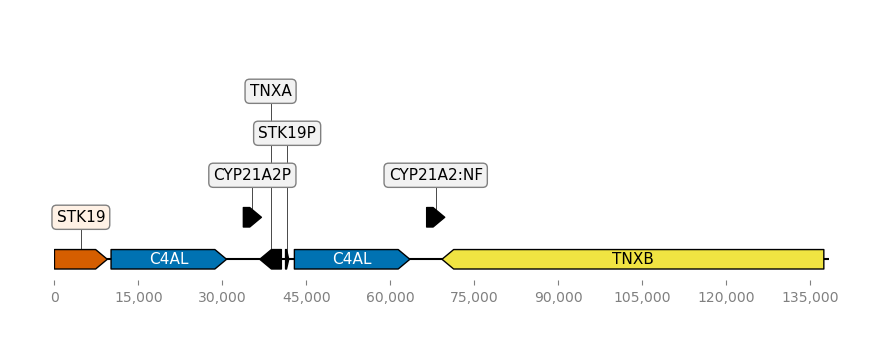

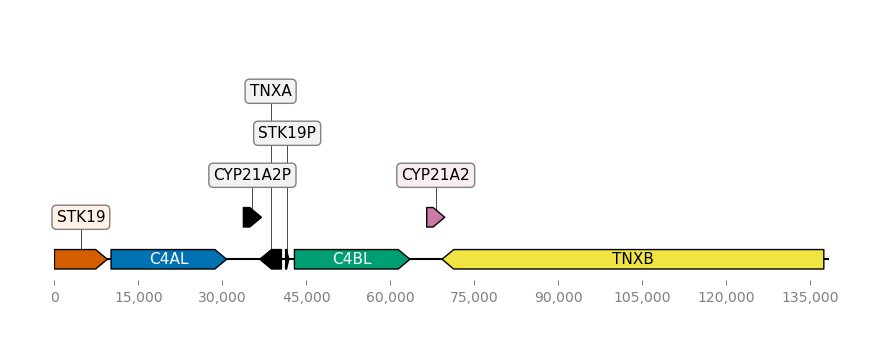

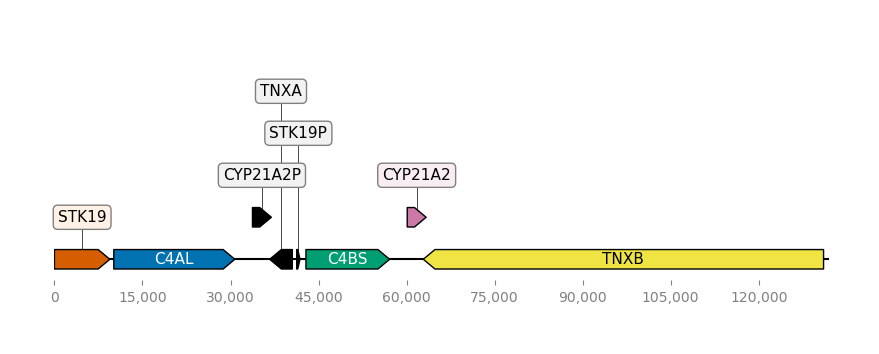

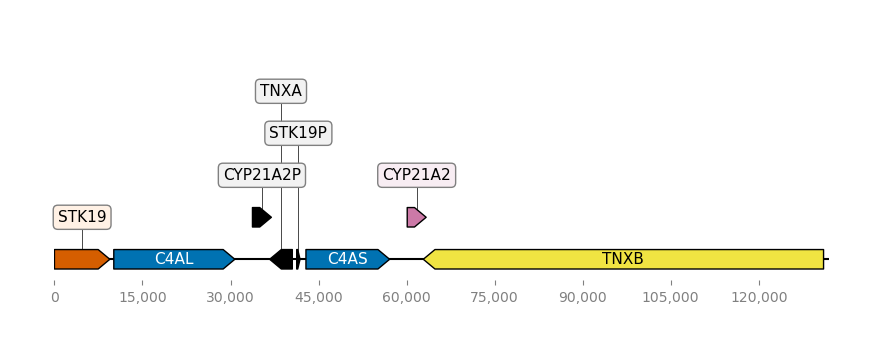

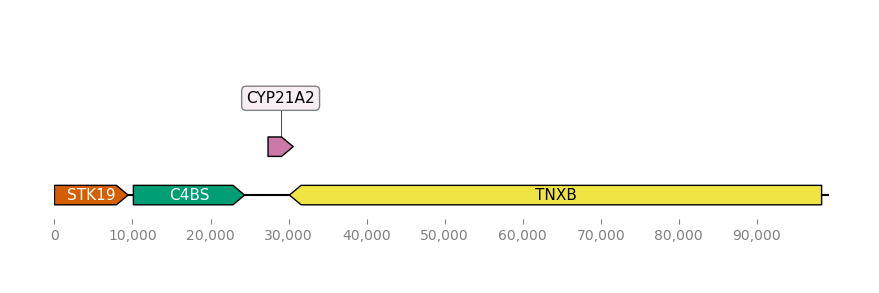

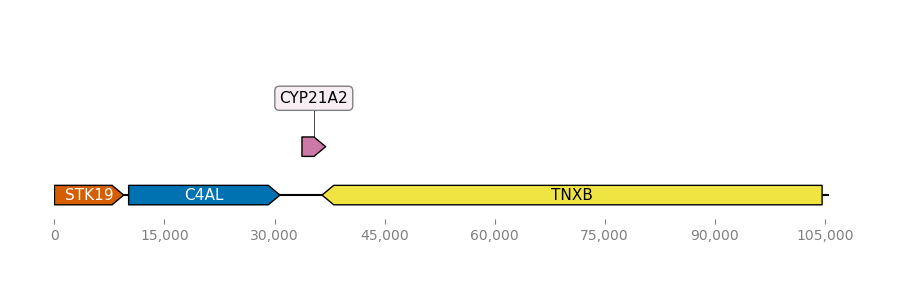

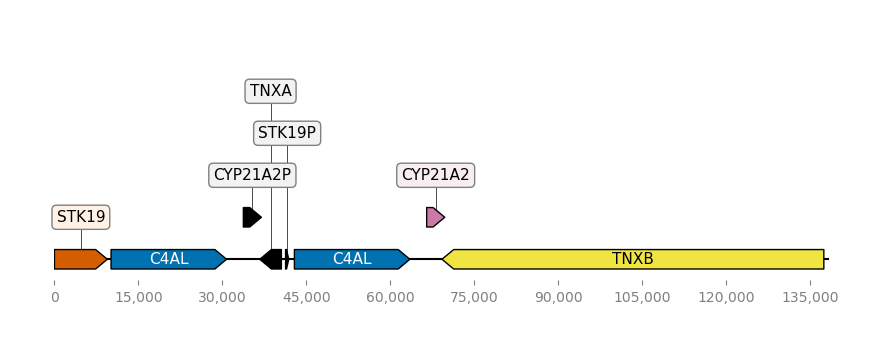

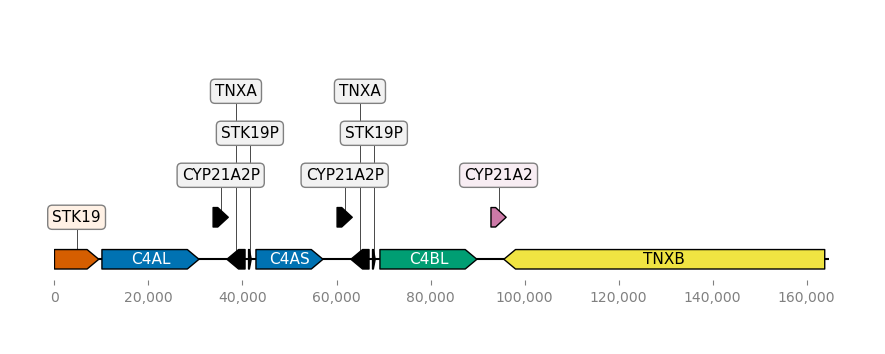

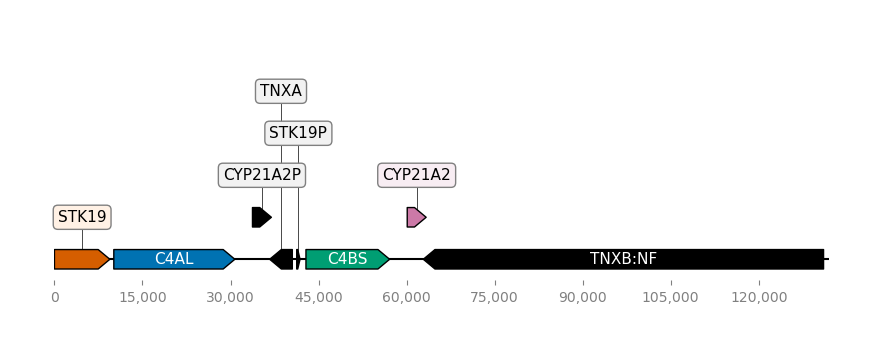

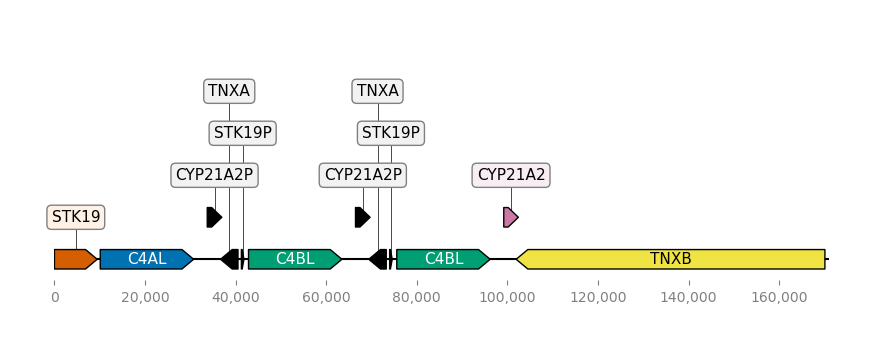

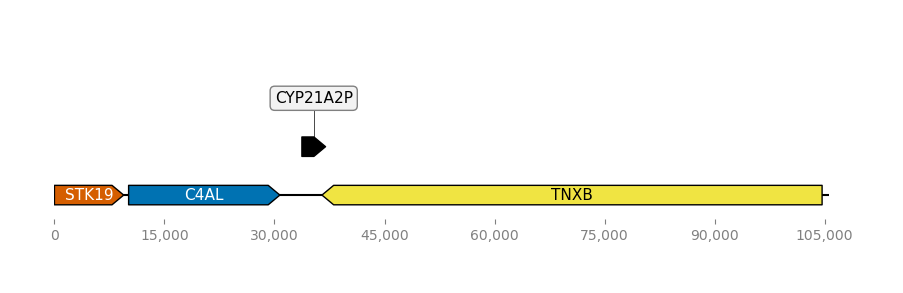

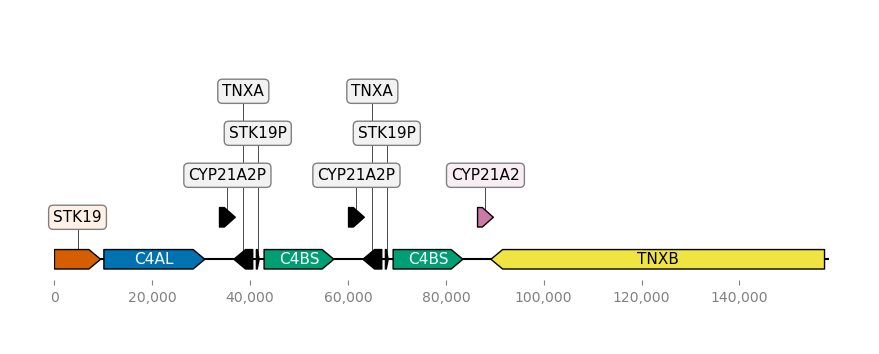

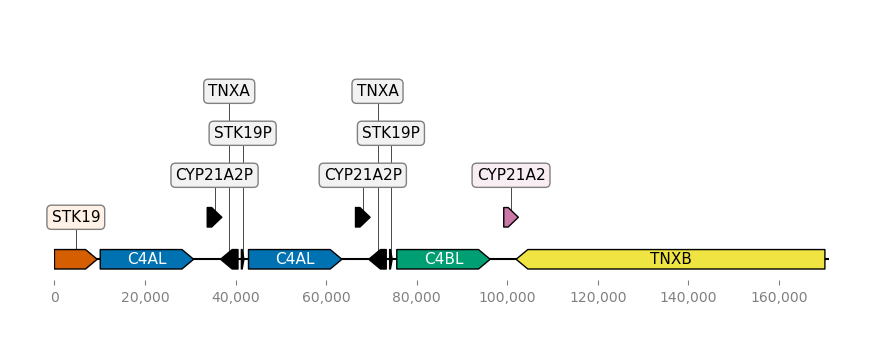

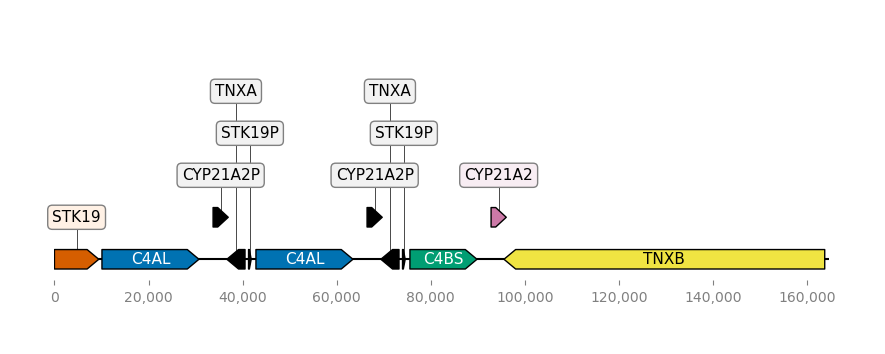

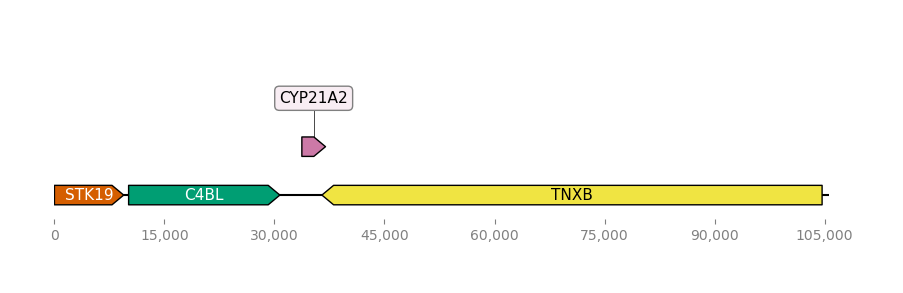

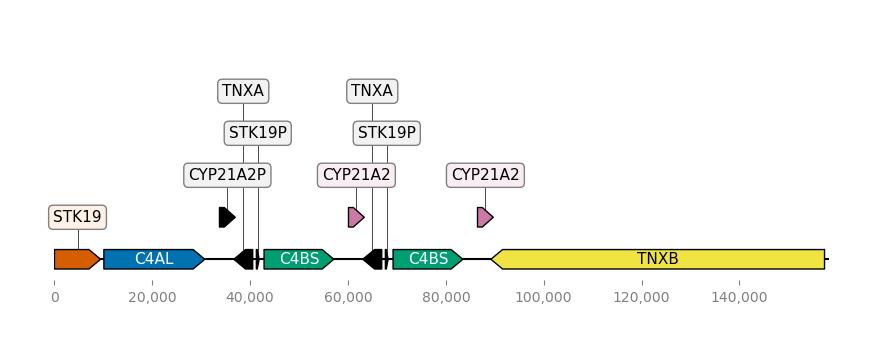

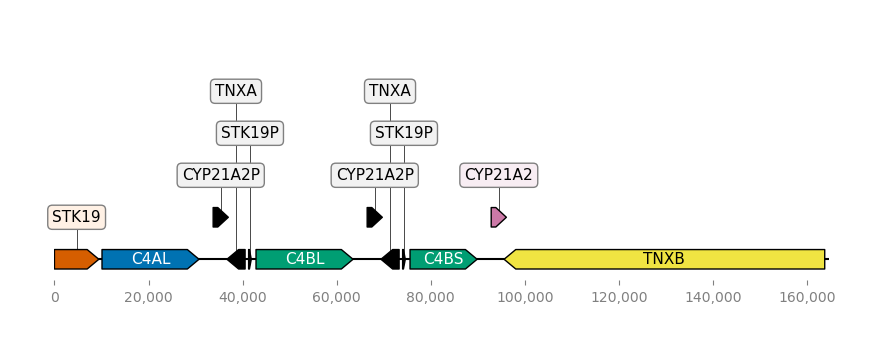

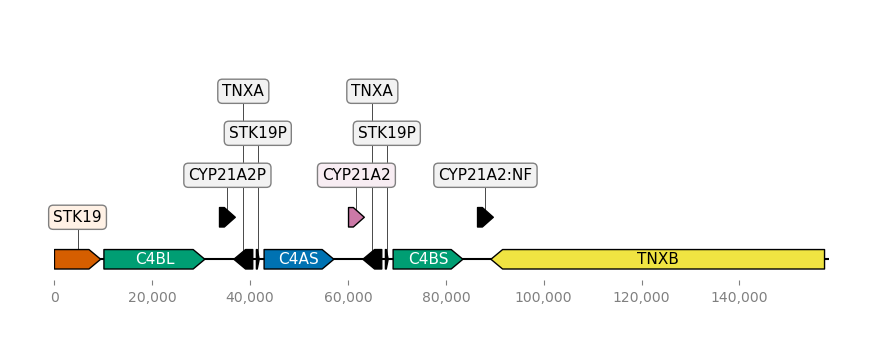

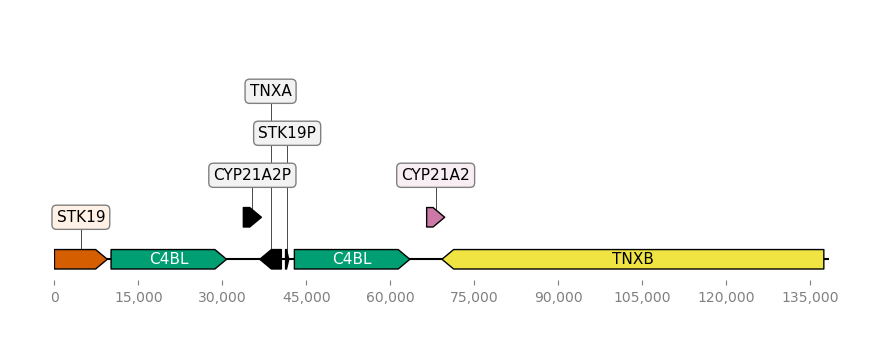

In [28]:
import matplotlib.pyplot as plt
geneList=['C4A_','CYP21A2_','STK19P_','STK19_','TNXA_','TNXB_']
ExonCount = {'C4A_':41,'CYP21A2_':10,'STK19P_':3,'STK19_':8,'TNXA_':13,'TNXB_':44}
ExonOrientation = {'C4A_':'+','CYP21A2_':'+','STK19P_':'+','STK19_':'+','TNXA_':'C','TNXB_':'C'}
geneColors = {'C4BL':'#009E73','C4BS':'#009E73','C4AL':'#0072B2','C4AS':'#0072B2','CYP21A2P':'#000000','CYP21A2:NF':'#000000','CYP21A2':'#CC79A7','STK19P':'#000000','STK19':'#D55E00','TNXA':'#000000','TNXB:NF':'#000000','TNXB':'#F0E442'}
shortList=['HG01352.hap2','chm13.hap1','HG01890.hap1','HG02554.hap2','HG02011.hap2','NA19705.hap1','NA19836.hap2','HG00864.hap2','HG00514.hap2','HG01352.hap1','HG01114.hap2','NA20847.hap1','NA20847.hap2','HG03248.hap1','NA18939.hap2','NA19331.hap1','NA19434.hap1','HG01573.hap2','HG04036.hap1']
sampleDictionary_Seq={}
#for sample in ['HG00514.hap2']:
#for sample in ['NA19240.hap2']:
for sample in shortList:
#for sample in ['HG01352.hap2']:
    
    features=[]
    
    tempDF = newDF_HumanFinal2[newDF_HumanFinal2['5']==sample].copy()
    startCoordinate = min([x for x in tempDF['6']])
    startCoordinateList=[]
    endCoordinateList=[]
    
    for row in tempDF.index:
        startCoordinateList.append(int(tempDF.at[row,'6'])-startCoordinate)
        endCoordinateList.append(int(tempDF.at[row,'7'])-startCoordinate)
        
    tempDF['NewStart']=startCoordinateList
    tempDF['NewEnd']=endCoordinateList
    
    
    for gene in geneList:
        #print(gene)
        
        geneDict = findGeneCounts(tempDF, gene, ExonCount,ExonOrientation)
        
        #Test to see what the label should be
        for geneHit in geneDict.keys():
            
            #Figure out the orientation
            if geneDict[geneHit]['Orientation'] == '+':
                thestrand = 1
            else:
                thestrand = -1   
                
            #Now test for specific genes    
            if str(gene) == 'C4A_':

                geneStart = int(geneDict[geneHit]['OriginalStart'])
                geneEnd = int(geneDict[geneHit]['OriginalEnd'])
                
                for iagene in immunoAnnotDict[sample]:
                    
                    x = range(geneStart,geneEnd)
                    y = range(int(iagene.split("-")[0]),int(iagene.split("-")[1]))
                    xs = set(x)
                    if len(xs.intersection(y))>0:
                        mylabel=str(immunoAnnotDict[sample][iagene])
                    else:
                        continue
                #print('mylabel', mylabel)
            
            elif str(gene) == 'TNXB_':

                geneStart = int(geneDict[geneHit]['OriginalStart'])
                geneEnd = int(geneDict[geneHit]['OriginalEnd'])
                
                for iagene in TNXBDict[sample].keys():
                    
                    x = range(geneStart,geneEnd)
                    y = range(int(iagene.split("-")[0]),int(iagene.split("-")[1]))
                    xs = set(x)
                    if len(xs.intersection(y))>0:
                        mylabel=str(TNXBDict[sample][iagene])
                    else:
                        continue
            
            
            elif str(gene) == 'CYP21A2_':

                geneStart = int(geneDict[geneHit]['OriginalStart'])
                geneEnd = int(geneDict[geneHit]['OriginalEnd'])
                
                for iagene in CYP21A2Dict[sample].keys():
                    
                    x = range(geneStart,geneEnd)
                    y = range(int(iagene.split("-")[0]),int(iagene.split("-")[1]))
                    xs = set(x)
                    if len(xs.intersection(y))>0:
                        mylabel=str(CYP21A2Dict[sample][iagene])
                    else:
                        continue
                #print('mylabel', mylabel)
            else:
                mylabel=str(gene.split("_")[0])
                #print('mylabel', mylabel)
                
                
            colorCode=geneColors[mylabel]
            features.append(GraphicFeature(start=geneDict[geneHit]['Start'], end=geneDict[geneHit]['End'], strand=thestrand, color=colorCode, label=mylabel))
    #print(features)
    record = GraphicRecord(sequence_length=max(tempDF['NewEnd'])+1000, features=features)
    tempList = []
    for feat in features:
        start=int(str(feat).split()[1].split("-")[0])
        end=int(str(feat).split()[1].split("-")[1])
        name=str(feat).split()[0].split("(")[1].split(",")[0]
        tempList.append([name,start,end])
    tempDF = pd.DataFrame(data=tempList, columns=['Names','Start','End'])
    sequence = '_'.join([x for x in tempDF.sort_values(by='Start')['Names']])
    sampleDictionary_Seq[sample]=sequence
    ax, _ = record.plot(figure_width=10)
    ax.figure.savefig('/home/mark/Desktop/HLA/C4_Master/Figures/Slimmed_Architecture/'+str(sample)+"_RCCX.pdf", bbox_inches='tight')

In [23]:
import collections
seqTotalRCCX = collections.Counter([y for y in sampleDictionary_Seq.values()])
print(len(seqTotalRCCX))

19


In [26]:
len(sampleDictionary_Seq)

132

In [27]:
sampleDictionary_Seq

{'chm13.hap1': 'STK19_C4AL_CYP21A2P_TNXA_STK19P_C4BL_CYP21A2_TNXB',
 'hg38.hap1': 'STK19_C4AL_CYP21A2P_TNXA_STK19P_C4BL_CYP21A2_TNXB',
 'HG01890.hap1': 'STK19_C4AL_CYP21A2P_TNXA_STK19P_C4BS_CYP21A2_TNXB',
 'HG01890.hap2': 'STK19_C4AL_CYP21A2P_TNXA_STK19P_C4BS_CYP21A2_TNXB',
 'HG02554.hap1': 'STK19_C4AL_CYP21A2P_TNXA_STK19P_C4BS_CYP21A2_TNXB',
 'HG02554.hap2': 'STK19_C4AL_CYP21A2P_TNXA_STK19P_C4AS_CYP21A2_TNXB',
 'HG02011.hap1': 'STK19_C4AL_CYP21A2P_TNXA_STK19P_C4BL_CYP21A2_TNXB',
 'HG02011.hap2': 'STK19_C4BS_CYP21A2_TNXB',
 'HG02282.hap1': 'STK19_C4AL_CYP21A2P_TNXA_STK19P_C4BS_CYP21A2_TNXB',
 'HG02282.hap2': 'STK19_C4AL_CYP21A2P_TNXA_STK19P_C4BS_CYP21A2_TNXB',
 'NA19705.hap1': 'STK19_C4AL_CYP21A2_TNXB',
 'NA19705.hap2': 'STK19_C4AL_CYP21A2P_TNXA_STK19P_C4BS_CYP21A2_TNXB',
 'NA19983.hap1': 'STK19_C4AL_CYP21A2P_TNXA_STK19P_C4BS_CYP21A2_TNXB',
 'NA19983.hap2': 'STK19_C4AL_CYP21A2P_TNXA_STK19P_C4BS_CYP21A2_TNXB',
 'NA20355.hap1': 'STK19_C4AL_CYP21A2P_TNXA_STK19P_C4BS_CYP21A2_TNXB',
 'NA203

In [24]:
seqTotalRCCX

Counter({'STK19_C4AL_CYP21A2P_TNXA_STK19P_C4BS_CYP21A2_TNXB': 60,
         'STK19_C4AL_CYP21A2P_TNXA_STK19P_C4BL_CYP21A2_TNXB': 28,
         'STK19_C4AL_CYP21A2_TNXB': 11,
         'STK19_C4AL_CYP21A2P_TNXA_STK19P_C4AS_CYP21A2_TNXB': 4,
         'STK19_C4AL_CYP21A2P_TNXA_STK19P_C4AL_CYP21A2_TNXB': 4,
         'STK19_C4AL_CYP21A2P_TNXA_STK19P_C4BS_CYP21A2P_TNXA_STK19P_C4BS_CYP21A2_TNXB': 4,
         'STK19_C4BS_CYP21A2_TNXB': 3,
         'STK19_C4AL_CYP21A2P_TNXA_STK19P_C4AS_CYP21A2P_TNXA_STK19P_C4BL_CYP21A2_TNXB': 3,
         'STK19_C4AL_CYP21A2P_TNXA_STK19P_C4BL_CYP21A2P_TNXA_STK19P_C4BL_CYP21A2_TNXB': 3,
         'STK19_C4BL_CYP21A2_TNXB': 2,
         'STK19_C4AL_CYP21A2P_TNXA_STK19P_C4BS_CYP21A2_TNXA_STK19P_C4BS_CYP21A2_TNXB': 2,
         'STK19_C4AL_CYP21A2P_TNXA_STK19P_C4BS_CYP21A2_TNXB:NF': 1,
         'STK19_C4AL_CYP21A2P_TNXA_STK19P_C4AL_CYP21A2:NF_TNXB': 1,
         'STK19_C4AL_CYP21A2P_TNXB': 1,
         'STK19_C4AL_CYP21A2P_TNXA_STK19P_C4AL_CYP21A2P_TNXA_STK19P_C4BL_CYP21A2_

In [125]:
sampleDictionary_Seq

{'chm13.hap1': 'STK19_C4AL_CYP21A2P_TNXA_STK19P_C4BL_CYP21A2_TNXB',
 'HG01890.hap1': 'STK19_C4AL_CYP21A2P_TNXA_STK19P_C4BS_CYP21A2_TNXB',
 'HG02554.hap2': 'STK19_C4AL_CYP21A2P_TNXA_STK19P_C4AS_CYP21A2_TNXB',
 'HG02011.hap2': 'STK19_C4BS_CYP21A2_TNXB',
 'NA19705.hap1': 'STK19_C4AL_CYP21A2_TNXB',
 'NA19836.hap2': 'STK19_C4AL_CYP21A2P_TNXA_STK19P_C4AL_CYP21A2_TNXB',
 'HG00864.hap2': 'STK19_C4AL_CYP21A2P_TNXA_STK19P_C4AS_CYP21A2P_TNXA_STK19P_C4BL_CYP21A2_TNXB',
 'HG00514.hap2': 'STK19_C4AL_CYP21A2P_TNXA_STK19P_C4BS_CYP21A2_TNXB:NF',
 'HG01352.hap1': 'STK19_C4AL_CYP21A2P_TNXA_STK19P_C4BL_CYP21A2P_TNXA_STK19P_C4BL_CYP21A2_TNXB',
 'HG01114.hap2': 'STK19_C4AL_CYP21A2P_TNXB',
 'NA20847.hap1': 'STK19_C4AL_CYP21A2P_TNXA_STK19P_C4BS_CYP21A2P_TNXA_STK19P_C4BS_CYP21A2_TNXB',
 'NA20847.hap2': 'STK19_C4AL_CYP21A2P_TNXA_STK19P_C4AL_CYP21A2P_TNXA_STK19P_C4BL_CYP21A2_TNXB',
 'HG03248.hap1': 'STK19_C4AL_CYP21A2P_TNXA_STK19P_C4AL_CYP21A2P_TNXA_STK19P_C4BS_CYP21A2_TNXB',
 'NA18939.hap2': 'STK19_C4BL_CYP21A2

In [122]:
for x in seqTotalRCCX:
    print(x)
    for sample,value in sampleDictionary_Seq.items():
        if x == value:
            print(sample)
        else:
            continue

STK19_C4AL_CYP21A2P_TNXA_STK19P_C4BL_CYP21A2_TNXB
chm13.hap1
hg38.hap1
HG02011.hap1
NA24385.hap1
NA24385.hap2
HG03009.hap2
HG03807.hap1
NA12329.hap2
NA18534.hap1
HG01457.hap1
HG01457.hap2
HG01114.hap1
HG00268.hap2
HG00171.hap2
HG02769.hap1
HG04217.hap1
NA18989.hap1
NA18989.hap2
HG01596.hap2
HG02018.hap2
HG02059.hap1
HG02059.hap2
NA19650.hap1
NA19650.hap2
HG02106.hap2
HG02492.hap1
HG00731.hap1
HG00733.hap2
STK19_C4AL_CYP21A2P_TNXA_STK19P_C4BS_CYP21A2_TNXB
HG01890.hap1
HG01890.hap2
HG02554.hap1
HG02282.hap1
HG02282.hap2
NA19705.hap2
NA19983.hap1
NA19983.hap2
NA20355.hap1
NA19836.hap1
HG03009.hap1
HG03807.hap2
HG00864.hap1
NA12329.hap1
HG00514.hap1
HG00513.hap1
HG00513.hap2
HG00512.hap1
HG00512.hap2
HG03520.hap1
HG03520.hap2
HG03371.hap1
HG03371.hap2
HG02953.hap1
HG02953.hap2
HG00268.hap1
HG00358.hap1
HG00171.hap1
HG00096.hap1
HG03248.hap2
HG02818.hap1
HG02818.hap2
HG02587.hap1
HG02587.hap2
HG02666.hap1
HG02666.hap2
HG01505.hap2
HG02018.hap1
NA19331.hap2
NA19347.hap1
NA19347.hap2
NA19384.

In [27]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from tqdm import tqdm

gv = GenomeViz(tick_style="axis")

for genome in sampleList3:
    if genome in genome_list.keys() and 'hap' in genome:
        print(genome)
        name, size, cds_list = genome_list[genome]["name"], genome_list[genome]["size"], genome_list[genome]["cds_list"]
        track = gv.add_feature_track(name, size)
        for idx, cds in tqdm(enumerate(cds_list, 1)):
            start, end, strand, mylabel, color  = cds
            #track.add_feature(start, end, strand, facecolor=color,linewidth=.2,labelrotation=0, labelvpos="top", labelhpos="center", labelha="center")
            #track.add_feature(start, end, strand, label=f"{mylabel}", linewidth=1, labelrotation=0, labelvpos="top", labelhpos="center", labelha="center")
            track.add_feature(start, end, strand, facecolor=color,labelrotation=0, plotstyle="box", labelvpos="top", labelhpos="center", labelha="center")
    else:
        continue
# Add Legends 
handles =[]
for color in ColorDict.keys():
    handles.append(Line2D([], [], marker=">", color=ColorDict[color], label=color, ms=10, ls="none"))

fig = gv.plotfig()
fig.subplots_adjust(wspace=0, hspace=1)
fig.legend(handles=handles, bbox_to_anchor=(1, 1))
fig.savefig("/home/mark/Desktop/C4_CYP21A2_Genome.svg")
#fig.savefig("/home/mark/Desktop/C4_CYP21A2_Genome.pdf")
#fig.savefig("/home/mark/Desktop/C4_CYP21A2_Genome.jpeg")

chm13.hap1


372it [00:00, 66567.73it/s]


hg38.hap1


373it [00:00, 66729.60it/s]


hg38.hap2


283it [00:00, 67661.63it/s]


HG01890.hap1


370it [00:00, 57945.35it/s]


HG01890.hap2


369it [00:00, 66679.51it/s]


HG02554.hap1


370it [00:00, 57537.17it/s]


HG02554.hap2


370it [00:00, 73040.55it/s]


HG02011.hap1


372it [00:00, 72855.86it/s]


HG02011.hap2


283it [00:00, 82521.41it/s]


HG02282.hap1


369it [00:00, 69662.79it/s]


HG02282.hap2


368it [00:00, 75721.34it/s]


NA19705.hap1


285it [00:00, 49915.51it/s]


NA19705.hap2


370it [00:00, 60519.15it/s]


NA19983.hap1


367it [00:00, 92108.04it/s]


NA19983.hap2


368it [00:00, 65538.78it/s]


NA20355.hap1


367it [00:00, 79304.98it/s]


NA20355.hap2


285it [00:00, 85985.95it/s]


NA19836.hap1


370it [00:00, 85296.94it/s]


NA19836.hap2


372it [00:00, 90466.81it/s]


NA24385.hap1


372it [00:00, 96272.05it/s]


NA24385.hap2


372it [00:00, 84467.36it/s]


HG03009.hap1


368it [00:00, 89785.58it/s]


HG03009.hap2


372it [00:00, 68352.44it/s]


HG03807.hap1


373it [00:00, 76457.60it/s]


HG03807.hap2


370it [00:00, 89907.45it/s]


HG00864.hap1


369it [00:00, 96797.68it/s]


HG00864.hap2


454it [00:00, 78754.87it/s]


NA12329.hap1


368it [00:00, 92982.16it/s]


NA12329.hap2


372it [00:00, 94803.81it/s]


NA18534.hap1


373it [00:00, 72661.53it/s]


NA18534.hap2


285it [00:00, 86483.62it/s]


HG00514.hap1


369it [00:00, 93834.01it/s]


HG00514.hap2


369it [00:00, 86396.01it/s]


HG00513.hap1


369it [00:00, 65040.27it/s]


HG00513.hap2


369it [00:00, 72846.57it/s]


HG00512.hap1


369it [00:00, 85080.43it/s]


HG00512.hap2


369it [00:00, 94487.07it/s]


HG01352.hap1


460it [00:00, 82969.80it/s]


HG01352.hap2


372it [00:00, 95249.44it/s]


HG01457.hap1


371it [00:00, 96699.40it/s]


HG01457.hap2


372it [00:00, 89784.85it/s]


HG01114.hap1


372it [00:00, 82137.35it/s]


HG01114.hap2


285it [00:00, 98807.79it/s]


HG03520.hap1


368it [00:00, 99690.23it/s]


HG03520.hap2


370it [00:00, 46958.74it/s]


HG03371.hap1


368it [00:00, 82394.91it/s]


HG03371.hap2


365it [00:00, 74018.32it/s]


HG02953.hap1


370it [00:00, 100452.62it/s]


HG02953.hap2


367it [00:00, 83178.95it/s]


HG00268.hap1


370it [00:00, 95654.12it/s]


HG00268.hap2


373it [00:00, 93412.67it/s]


HG00358.hap1


369it [00:00, 99543.23it/s]


HG00358.hap2


454it [00:00, 64249.07it/s]


HG00171.hap1


368it [00:00, 96048.78it/s]


HG00171.hap2


372it [00:00, 100120.71it/s]


HG00096.hap1


368it [00:00, 58703.98it/s]


HG00096.hap2


283it [00:00, 98998.17it/s]


NA20847.hap1


453it [00:00, 85332.78it/s]


NA20847.hap2


459it [00:00, 95880.55it/s]


HG02769.hap1


372it [00:00, 98137.06it/s]


HG02769.hap2


284it [00:00, 87119.31it/s]


HG03248.hap1


454it [00:00, 94464.43it/s]


HG03248.hap2


366it [00:00, 97177.65it/s]


HG02818.hap1


370it [00:00, 99684.77it/s]


HG02818.hap2


367it [00:00, 90568.93it/s]


HG02587.hap1


370it [00:00, 96348.95it/s]


HG02587.hap2


370it [00:00, 62060.80it/s]


HG02666.hap1


368it [00:00, 94300.09it/s]


HG02666.hap2


370it [00:00, 97254.65it/s]


HG01505.hap1


369it [00:00, 93556.08it/s]


HG01505.hap2


368it [00:00, 96886.82it/s]


HG03732.hap1


453it [00:00, 97567.00it/s]


HG03732.hap2


369it [00:00, 88596.84it/s]


HG04217.hap1


372it [00:00, 89702.26it/s]


HG04217.hap2


283it [00:00, 96456.04it/s]


NA18989.hap1


372it [00:00, 98428.03it/s]


NA18989.hap2


371it [00:00, 83422.87it/s]


NA18939.hap1


454it [00:00, 72085.63it/s]


NA18939.hap2


285it [00:00, 100595.53it/s]


HG01596.hap1


286it [00:00, 92831.68it/s]


HG01596.hap2


371it [00:00, 98937.36it/s]


HG02018.hap1


369it [00:00, 99806.42it/s]


HG02018.hap2


372it [00:00, 81087.26it/s]


HG02059.hap1


372it [00:00, 94214.18it/s]


HG02059.hap2


372it [00:00, 98124.71it/s]


NA19331.hap1


452it [00:00, 84938.41it/s]


NA19331.hap2


370it [00:00, 96787.61it/s]


NA19347.hap1


370it [00:00, 100674.18it/s]


NA19347.hap2


370it [00:00, 82184.64it/s]


NA19384.hap1


369it [00:00, 71431.12it/s]

NA19384.hap2



368it [00:00, 97597.46it/s]


NA19317.hap1


368it [00:00, 69718.77it/s]


NA19317.hap2


370it [00:00, 79751.91it/s]


NA19434.hap1


456it [00:00, 71211.65it/s]


NA19434.hap2


452it [00:00, 80570.57it/s]


NA19036.hap1


367it [00:00, 84517.08it/s]


NA19036.hap2


367it [00:00, 90393.42it/s]


NA21487.hap1


367it [00:00, 96666.01it/s]


NA21487.hap2


285it [00:00, 94758.35it/s]


HG03065.hap1


370it [00:00, 76159.03it/s]


HG03065.hap2


368it [00:00, 59749.31it/s]


HG03456.hap1


370it [00:00, 94975.06it/s]


HG03456.hap2


366it [00:00, 73559.60it/s]


HG03452.hap1


367it [00:00, 96008.83it/s]


HG03452.hap2


285it [00:00, 68739.31it/s]


NA19650.hap1


372it [00:00, 72507.14it/s]


NA19650.hap2


372it [00:00, 99090.63it/s]


HG01573.hap1


371it [00:00, 68601.45it/s]


HG01573.hap2


454it [00:00, 68659.91it/s]


HG02106.hap1


460it [00:00, 89022.28it/s]


HG02106.hap2


371it [00:00, 84675.78it/s]


HG02492.hap1


372it [00:00, 73838.49it/s]


HG02492.hap2


373it [00:00, 79873.15it/s]


HG00732.hap1


285it [00:00, 95385.94it/s]


HG00732.hap2


285it [00:00, 98922.26it/s]


HG00731.hap1


372it [00:00, 98415.61it/s]


HG00731.hap2


283it [00:00, 69859.81it/s]


HG00733.hap1


285it [00:00, 69750.07it/s]


HG00733.hap2


372it [00:00, 75009.91it/s]


HG03683.hap1


460it [00:00, 85080.91it/s]


HG03683.hap2


368it [00:00, 97578.95it/s]


HG04036.hap1


373it [00:00, 84342.84it/s]


HG04036.hap2


367it [00:00, 85645.67it/s]


NA20509.hap1


368it [00:00, 65041.67it/s]


NA20509.hap2


368it [00:00, 57569.80it/s]


NA19239.hap1


368it [00:00, 93585.39it/s]


NA19239.hap2


370it [00:00, 93358.15it/s]


NA19129.hap1


285it [00:00, 67046.76it/s]


NA19129.hap2


370it [00:00, 68149.15it/s]


NA19240.hap1


370it [00:00, 82067.29it/s]


NA19240.hap2


453it [00:00, 88364.79it/s]


NA19238.hap1


453it [00:00, 63735.52it/s]


NA19238.hap2


367it [00:00, 84318.01it/s]
